Agglomerative : This is called "bottom-up". Each observation starts in its own cluster and pairs of cluster are merged as one moves up the hierarchy.

Divisive : This is called "top-down". All observation start in one cluster and splits are performed recursively as one moves down the hierarchy.

#### Agglomerative Clustering :

In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
X=np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])

In [3]:
agc=AgglomerativeClustering()

In [4]:
agc.fit(X)

AgglomerativeClustering()

In [5]:
agc.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

#### Agglomerative Clustering in Iris dataset 

In [7]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

In [20]:
def plot_dendrogram(model,**kwargs):
    
#linkage matrix -> dendrogram
#count of sample under each nodes
    counts = np.zeros(model.children_.shape[0])
    n_samples=len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count=0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count+=1 #leaf node
            else:
                current_count += counts[child_idx-n_samples]
            counts[i] = current_count
        linkage_matrix=np.column_stack(
            [model.children_,model.distances_,counts]
        ).astype(float)
    
    dendrogram(linkage_matrix,**kwargs)

In [21]:
iris=load_iris()

In [22]:
X=iris.data

In [23]:
model=AgglomerativeClustering(distance_threshold=0,n_clusters=None)

In [24]:
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

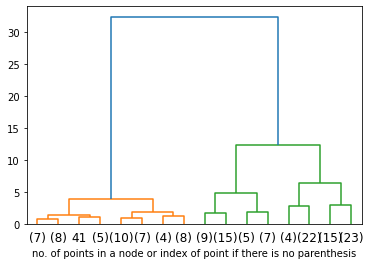

In [25]:
plot_dendrogram(model,truncate_mode='level',p=3)
plt.xlabel("no. of points in a node or index of point if there is no parenthesis")
plt.show()